In [2]:
import pandas as pd
from matplotlib import cm
import numpy as np
from math import floor, ceil
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score


In [4]:
from Preprocess import *

In [3]:
from plot import *
markers=['.','+','x','_',',','|','1','2','3','4','8','>','<']
cmap1 = plt.cm.RdBu
cmap2 = plt.cm.Set2
cmap3 = plt.cm.tab20c
# cmap3 = plt.cm.hot
C =ListedColormap (np.random.rand (20,3)).colors


## Comparison Metric

假设 node={x=(0.5,1),e_empty=0.8, f1=[-1,1],f2=[-2,2]},the denisity vanish as recentage become larger.

## MLP

2728 2727
Iteration 1, loss = 1.72334166
Iteration 2, loss = 0.72733198
Iteration 3, loss = 0.56574369
Iteration 4, loss = 0.28474908
Iteration 5, loss = 0.34124431
Iteration 6, loss = 0.20393132
Iteration 7, loss = 0.14939133
Iteration 8, loss = 0.26623458
Iteration 9, loss = 0.32182366
Iteration 10, loss = 0.25982908
Training loss did not improve more than tol=0.000010 for two consecutive epochs. Stopping.


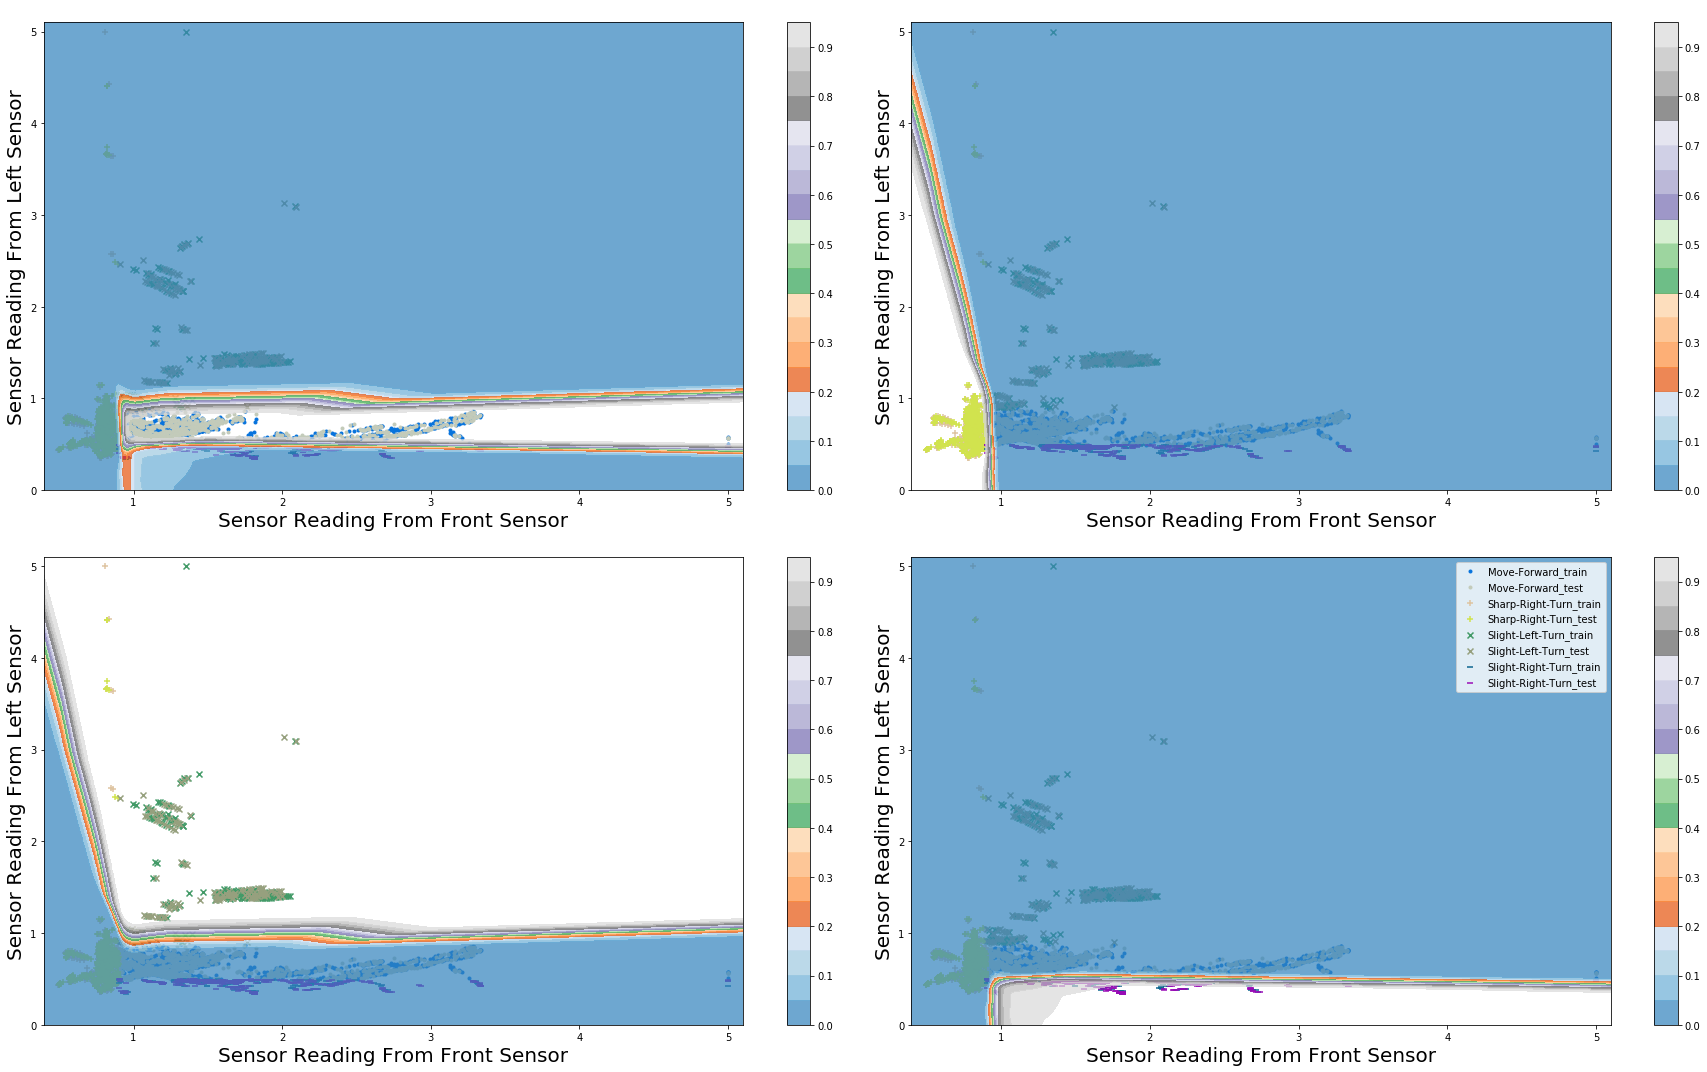

('Training set score: 0.944628', 2727)
('Test set score: 0.945748', 2728)


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
file1=['./data/robot/2/','2.csv']

X_train, X_test, y_train, y_test = read_data(file1[0])
print len(X_train),len(X_test)

X=np.concatenate((X_train,X_test), axis=0)
y=np.concatenate((y_train,y_test), axis=0)

X_train, X_test, y_train, y_test = \
        train_test_split(X,y, test_size=0.5, random_state=1)   
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100,), max_iter=200, alpha=1e-4,
                    solver='adam', verbose=10, tol=1e-5, random_state=1,
                    learning_rate_init=.1)
mlp.fit(X_train, y_train)

label=mlp.classes_


figure = plt.figure(figsize=(25, 15))
h=0.02
x1_min, x1_max = X.T[0].min() - .1, X.T[0].max() +.1
x2_min, x2_max =X.T[1].min() - .1, X.T[1].max() + .1
xx, yy = np.meshgrid(np.arange(x1_min-1, x1_max+1, h),np.arange(x2_min-1, x2_max+1, h))
for i in xrange(0,len(label)):
    ax = plt.subplot(2, 2, i+1)
    ax.set_title(" ")
    ax.set_ylim(x2_min, x2_max)
    ax.set_xticks(range(int(floor(x1_min)),int(ceil(x1_max))))
    ax.set_yticks(range(int(floor(x2_min)),int(ceil(x2_max))))
    ax.set_xlabel('Sensor Reading From Front Sensor',size=20)
    ax.set_ylabel('Sensor Reading From Left Sensor',size=20)
    k=0
    for j in range(0,len(label)):
        index=(y_train==label[j])
        ax.scatter(X_train[index].T[0], X_train[index].T[1], c=C[k],marker=markers[j],label=label[j]+'_train')
        k+=1
        index=(y_test==label[j])
        ax.scatter(X_test[index].T[0], X_test[index].T[1], c=C[k],marker=markers[j],label=label[j]+'_test')
        ax.set_xlim(x1_min, x1_max)
        k+=1
    Z = mlp.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, i]
    Z = Z.reshape(xx.shape)
    cntr1 = ax.contourf(xx, yy, Z, cmap=cmap3,levels=np.arange(0,1,0.05), alpha=.7)
    cbar0 = plt.colorbar( cntr1,)
plt.legend()
plt.tight_layout()
plt.show()

print("Training set score: %f" % mlp.score(X_train, y_train),len(y_train))

print("Test set score: %f" % mlp.score(X_test, y_test),len(y_test))

Iteration 1, loss = 2.77554354
Iteration 2, loss = 0.52892379
Iteration 3, loss = 0.39735900
Iteration 4, loss = 0.35082588
Iteration 5, loss = 0.26810686
Iteration 6, loss = 0.77858569
Iteration 7, loss = 0.41174831
Iteration 8, loss = 0.27066392
Training loss did not improve more than tol=0.000001 for two consecutive epochs. Stopping.


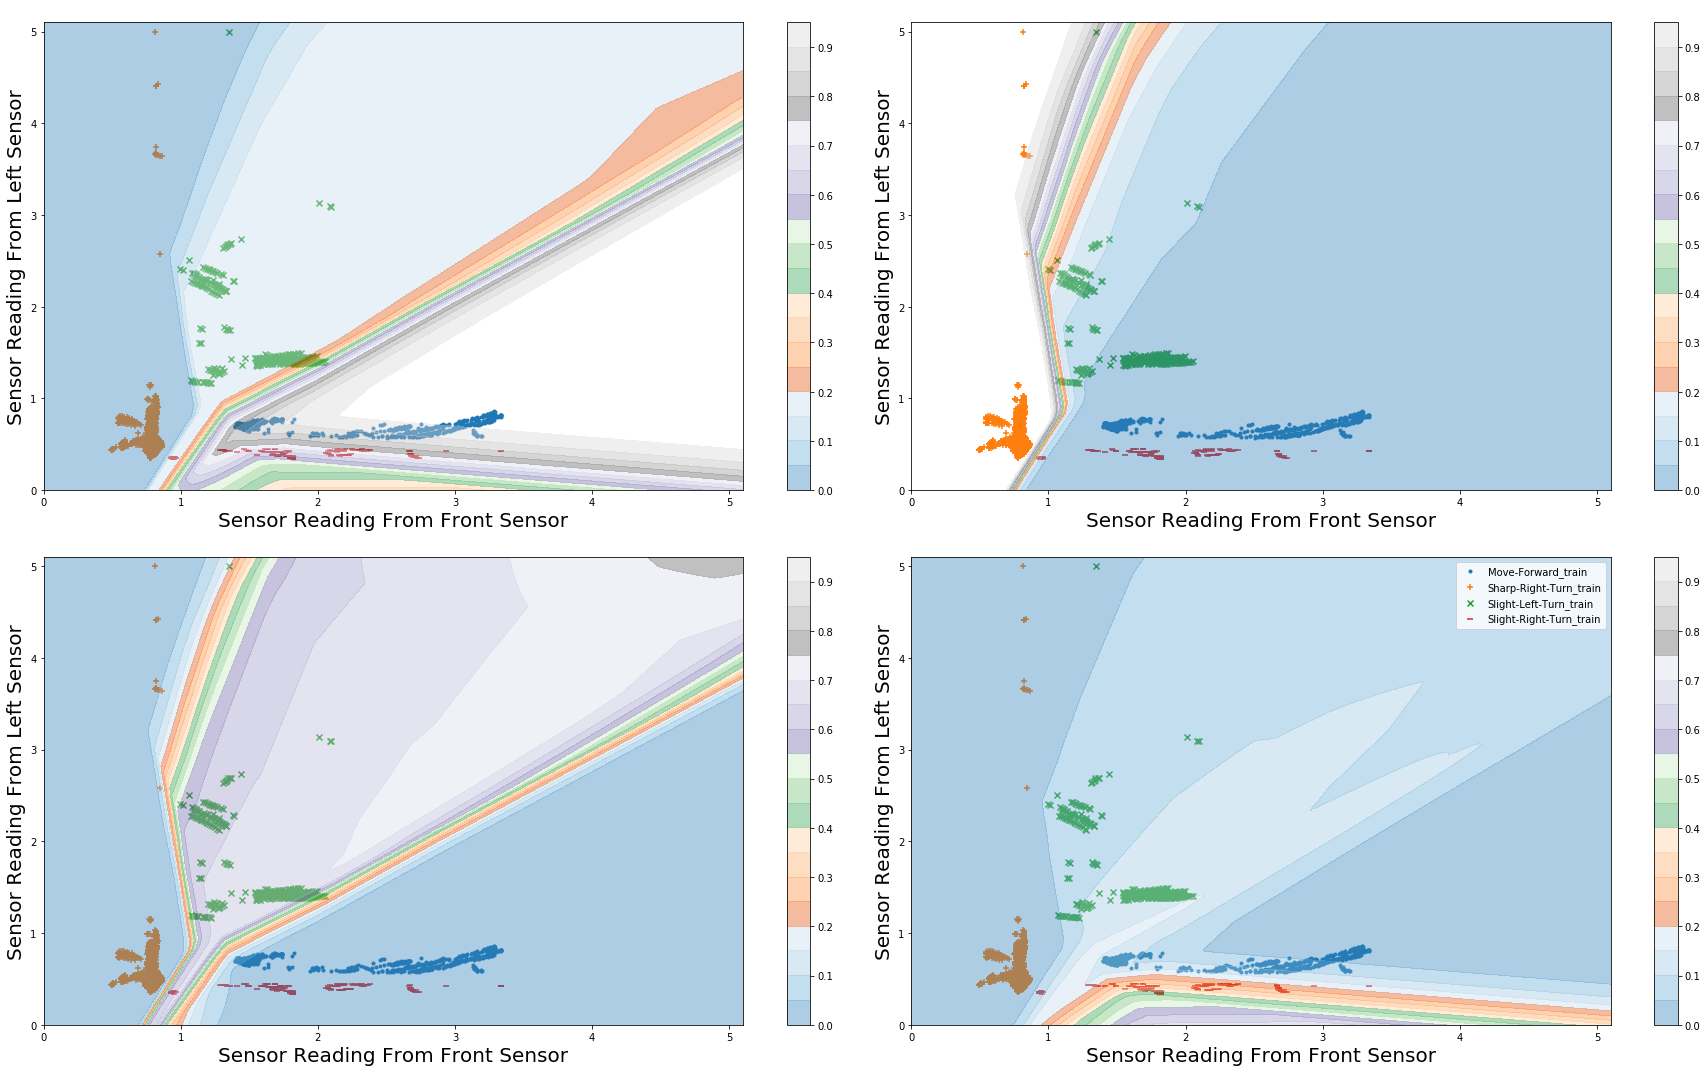

('Training set score: 0.923021', 2728)
('Test set score: 0.478181', 2727)


In [11]:

file1=['./data/robot/2/','2.csv']

X_train, X_test, y_train, y_test = read_data(file1[0])

mlp = MLPClassifier(hidden_layer_sizes=(200,150,100,), max_iter=100, alpha=1e-4,
                    solver='adam', verbose=10, tol=1e-6, random_state=1,
                    learning_rate_init=.1)
mlp.fit(X_train, y_train)

label=mlp.classes_


figure = plt.figure(figsize=(25, 15))
h=0.02
x1_min, x1_max = X.T[0].min() - .1, X.T[0].max() +.1
x2_min, x2_max =X.T[1].min() - .1, X.T[1].max() + .1
xx, yy = np.meshgrid(np.arange(x1_min-1, x1_max+1, h),np.arange(x2_min-1, x2_max+1, h))

for i in xrange(0,len(label)):
    ax = plt.subplot(2, 2, i+1)
    ax.set_title(" ")
    ax.set_ylim(x2_min, x2_max)
    ax.set_xlim(x1_min, x1_max)
    ax.set_xticks(range(int(floor(x1_min)),int(ceil(x1_max))))
    ax.set_yticks(range(int(floor(x2_min)),int(ceil(x2_max))))
    ax.set_xlabel('Sensor Reading From Front Sensor',size=20)
    ax.set_ylabel('Sensor Reading From Left Sensor',size=20)
    k=0
    for j in range(0,len(label)):
        index=(y_train==label[j])
        ax.scatter(X_train[index].T[0], X_train[index].T[1],cmap=cmap1,marker=markers[j],label=label[j]+'_train')
        k+=1
#         index=(y_test==label[j])
#         ax.scatter(X_test[index].T[0], X_test[index].T[1] ,c=C[k],marker=markers[j],label=label[j]+'_test')
#         k+=1
    Z = mlp.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, i]
    Z = Z.reshape(xx.shape)
    cntr1 = ax.contourf(xx, yy, Z, cmap=cmap3,levels=np.arange(0,1,0.05), alpha=.4)
    cbar0 = plt.colorbar( cntr1,)
plt.legend()
plt.tight_layout()
plt.show()

print("Training set score: %f" % mlp.score(X_train, y_train),len(y_train))

print("Test set score: %f" % mlp.score(X_test, y_test),len(y_test))

Progress: 1
Progress: 2
Progress: 3
Progress: 4
Progress: 5
Progress: 6
Progress: 7
Progress: 8
Progress: 9
Progress: 10
Progress: 11
Progress: 12
Progress: 13
Progress: 14
Progress: 15
Progress: 16
Progress: 17
Progress: 18
Progress: 19
Progress: 20
Progress: 21
Progress: 22
Progress: 23
Progress: 24
Progress: 25
Progress: 26
Progress: 27
Progress: 28
Progress: 29
Progress: 30
Progress: 31
Progress: 32
Progress: 33
Progress: 34
Progress: 35
Progress: 36
Progress: 37
Progress: 38
Progress: 39
Progress: 40
Progress: 41
Progress: 42
Progress: 43
Progress: 44
Progress: 45
Progress: 46
Progress: 47
Progress: 48
Progress: 49
Progress: 50
Progress: 51
Progress: 52
Progress: 53
Progress: 54
Progress: 55
Progress: 56
Progress: 57
Progress: 58
Progress: 59
Progress: 60
Progress: 61
Progress: 62
Progress: 63
Progress: 64
Progress: 65
Progress: 66
Progress: 67
Progress: 68
Progress: 69
Progress: 70
Progress: 71
Progress: 72
Progress: 73
Progress: 74
Progress: 75
Progress: 76
Progress: 77
Progress

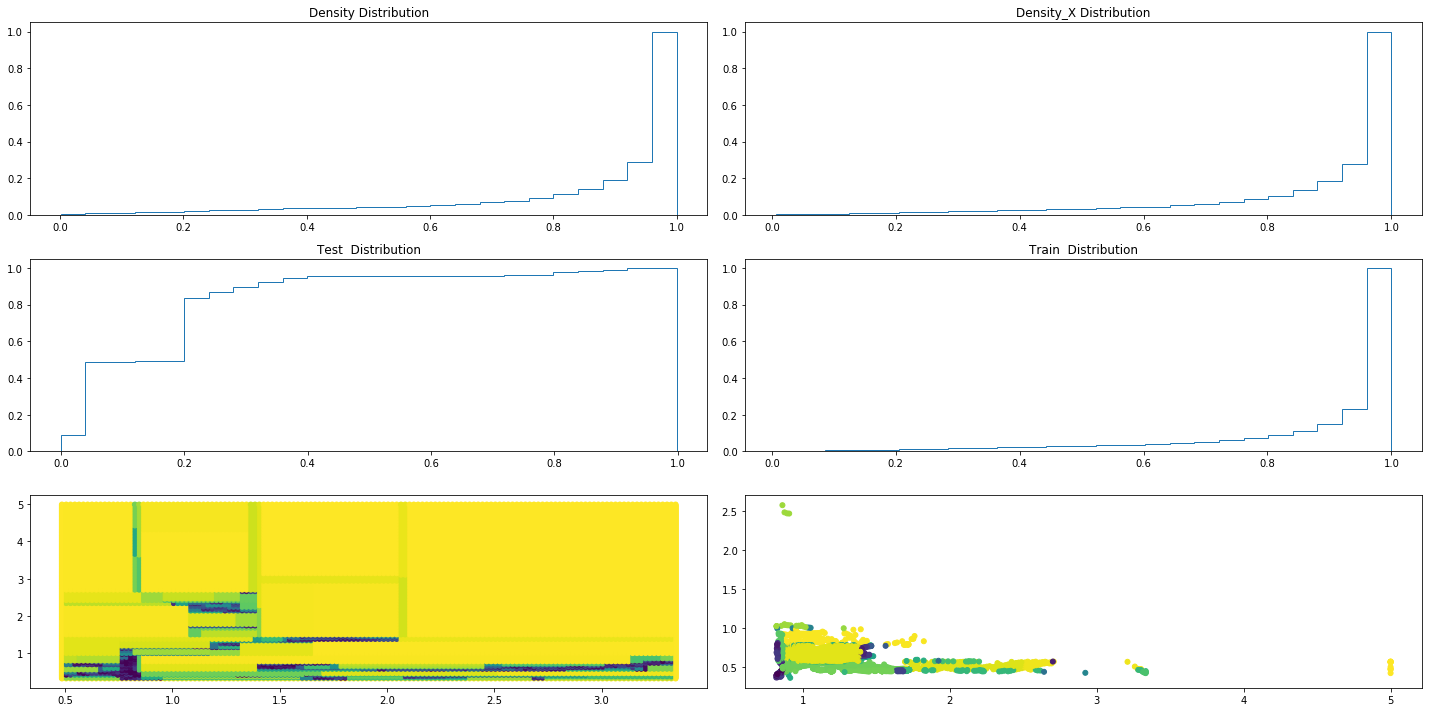

In [27]:

file1=['./data/robot/2/','2.csv']

X_train, X_test, y_train, y_test = read_data(file1[0])
 

figure = plt.figure(figsize=(20, 10))


"""
Train CLTree
"""
tree=CLTree(criterion='gini',min_samples_leaf=1, max_depth=50,gain_ratio_threshold=0.00001)
tree.fit(X_train,1,1)
yt=tree.predict(X_train)
yp=tree.predict(X_test)

inds=[yp<0.1,np.logical_and(yp>=0.1,yp<0.2),np.logical_and(yp>=0.2,yp<0.3),\
    np.logical_and(yp>=0.3,yp<0.4),np.logical_and(yp>=0.4,yp<0.5),np.logical_and(yp>=0.6,yp<0.7),\
    np.logical_and(yp>=0.6,yp<0.7),np.logical_and(yp>=0.7,yp<0.8),np.logical_and(yp>=0.8,yp<0.9),\
    np.logical_and(yp>=0.9,yp<0.95),np.logical_and(yp>=0.95,yp<1)]



ax = plt.subplot(3, 2, 1)
ax.set_title("Density Distribution")
plt.hist(tree.density[tree.density>0],bins=25,density=True, histtype='step',cumulative=True)
ax = plt.subplot(3, 2, 2)
ax.set_title("Density_X Distribution")
plt.hist(tree.density_X[tree.density_X>0],bins=25,density=True, histtype='step',cumulative=True)


ax = plt.subplot(3, 2, 3)
ax.set_title("Test  Distribution")
plt.hist(yp,bins=25,density=True, histtype='step',cumulative=True)
ax = plt.subplot(3, 2, 4)
ax.set_title("Train  Distribution")
plt.hist(yt,bins=25,density=True, histtype='step',cumulative=True)


h=0.02
x1_min, x1_max = X_train.T[0].min() - .01, X_train.T[0].max() +.01
x2_min, x2_max =X_train.T[1].min() - .01, X_train.T[1].max() + .01
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h),np.arange(x2_min, x2_max, h))
M=np.c_[xx.ravel(), yy.ravel()]
R=tree.predict(M)
ax = plt.subplot(3, 2, 5)
ax.scatter(M.T[0], M.T[1],c=1-R,marker=".",s=100)

ax = plt.subplot(3, 2, 6)
ax.scatter(X_test.T[0], X_test.T[1],c=1-yp,marker=".",s=100)
plt.legend()
plt.tight_layout()
plt.show()







In [17]:

mlp = MLPClassifier(hidden_layer_sizes=(200,150,100,), max_iter=100, alpha=1e-4,
                    solver='adam', verbose=10, tol=1e-5, random_state=1,
                    learning_rate_init=.1)
mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train),len(y_train))

print("Test set score: %f" % mlp.score(X_test, y_test),len(y_test))



Iteration 1, loss = 2.77554354
Iteration 2, loss = 0.52892379
Iteration 3, loss = 0.39735900
Iteration 4, loss = 0.35082588
Iteration 5, loss = 0.26810686
Iteration 6, loss = 0.77858569
Iteration 7, loss = 0.41174831
Iteration 8, loss = 0.27066392
Training loss did not improve more than tol=0.000010 for two consecutive epochs. Stopping.
('Training set score: 0.923021', 2728)
('Test set score: 0.478181', 2727)


In [28]:
yt.sort()
k=int(floor(len(yt)*0.02))
threshold=yt[k]
print 'Threshold',threshold





yp=tree.predict(X)


label=mlp.classes_
y_pred= np.array(mlp.predict_proba(X))
y_pred_index=np.argmax(y_pred, axis=1)
yh= np.array([ [label[i],y_true,float(prob[i])] for i,y_true,prob in zip(y_pred_index,y,y_pred)])    
ymlp= np.array([ float(prob[i]) for i,prob in zip(y_pred_index,y_pred)])
    


id1=np.logical_or(yp<threshold,ymlp<0.7)

id2=np.logical_and(yp>=threshold,ymlp>=0.7)

print "Test Uncertain", accuracy_score(yh.T[0][id1], yh.T[1][id1]), len(yh.T[1][id1])
print "Test certain", accuracy_score(yh.T[0][id2], yh.T[1][id2]),len(yh.T[1][id2])


Threshold 0.341968336829
Test Uncertain 0.489905787349 2972
Test certain 0.952879581152 2483


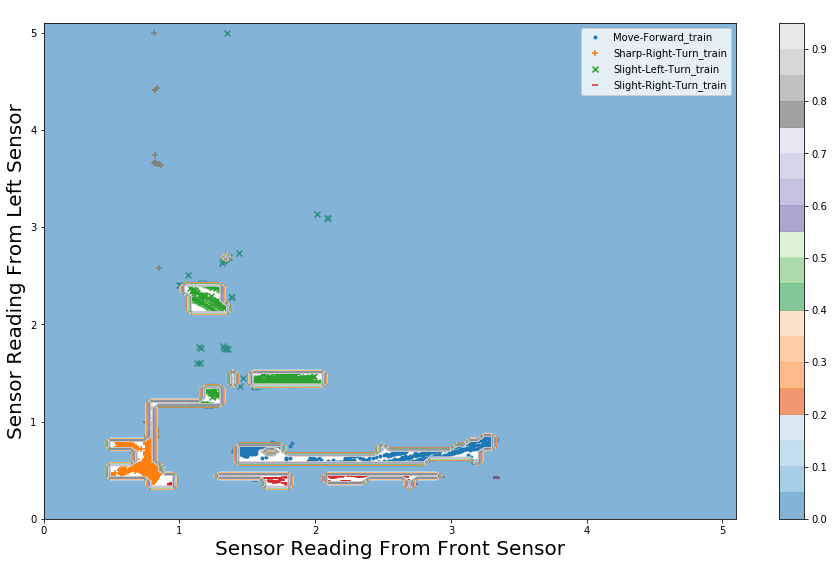

In [47]:
figure = plt.figure(figsize=(25, 15))
h=0.05
x1_min, x1_max = X.T[0].min() - .1, X.T[0].max() +.1
x2_min, x2_max =X.T[1].min() - .1, X.T[1].max() + .1
xx, yy = np.meshgrid(np.arange(x1_min-1, x1_max+1, h),np.arange(x2_min-1, x2_max+1, h))
ax = plt.subplot(2, 2, i+1)
ax.set_title(" ")
ax.set_ylim(x2_min, x2_max)
ax.set_xlim(x1_min, x1_max)
ax.set_xticks(range(int(floor(x1_min)),int(ceil(x1_max))))
ax.set_yticks(range(int(floor(x2_min)),int(ceil(x2_max))))
ax.set_xlabel('Sensor Reading From Front Sensor',size=20)
ax.set_ylabel('Sensor Reading From Left Sensor',size=20)

k=0
for j in range(0,len(label)):
    index=(y_train==label[j])
    ax.scatter(X_train[index].T[0], X_train[index].T[1],cmap=cmap1,marker=markers[j],label=label[j]+'_train')
    k+=1
    index=(y_test==label[j])
#     ax.scatter(X_test[index].T[0], X_test[index].T[1] ,c=C[5],marker=markers[j],label=label[j]+'_test')
    k+=1
Zt=tree.predict(np.c_[xx.ravel(), yy.ravel()])
Zt=Zt>0.36+np.zeros(len(Zt))
Z=Zt
Z = Z.reshape(xx.shape)
cntr1 = ax.contourf(xx, yy, Z, cmap=cmap3,levels=np.arange(0,1,0.05), alpha=.6)
cbar0 = plt.colorbar( cntr1,)
plt.legend()
plt.tight_layout()
plt.show()

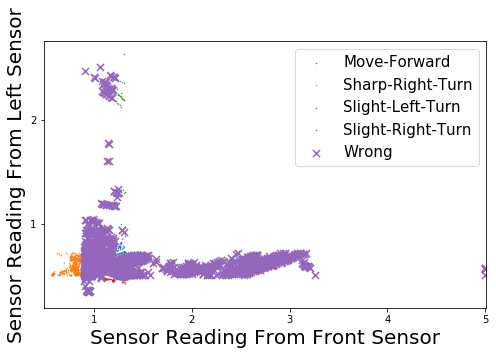

In [247]:

file1=['./data/robot/2/','2.csv']
X_train, X_test, y_train, y_test = read_data(file1[0])
X=X_test
y=y_test

y_pred= np.array(mlp.predict_proba(X))
y_pred_index=np.argmax(y_pred, axis=1)
y_h= np.array([ [label[i],y_true,float(prob[i])] for i,y_true,prob in zip(y_pred_index,y,y_pred)])    
index_wrong=(y_h.T[0]!=y_h.T[1])
X_wrong =X[index_wrong]

figure = plt.figure(figsize=(7, 5))
ax = plt.subplot(1, 1, 1)
ax.set_xticks(range(int(floor(x1_min)),int(ceil(x1_max))))
ax.set_yticks(range(int(floor(x2_min)),int(ceil(x2_max))))
ax.set_xlabel('Sensor Reading From Front Sensor',size=20)
ax.set_ylabel('Sensor Reading From Left Sensor',size=20)
for j in range(0,len(label)):
    index=(y==label[j])
    ax.scatter(X[index].T[0], X[index].T[1], cmap=cmap1,marker='.',label=label[j],s=1)
    ax.set_xlim(x1_min, x1_max)

ax.scatter(X[index_wrong].T[0], X[index_wrong].T[1], cmap=cmap2,marker='x',s=50,label='Wrong')
plt.legend(prop={'size':15})
plt.tight_layout()
plt.show()



In [248]:
# 总错误/ 总预测

print 'n_wrong:',len(y_h[index_wrong]),'n_sample',float(len(y_h)),'error_rate',len(y_h[index_wrong])/float(len(y_h))



n_wrong: 1807 n_sample 2724.0 error_rate 0.663362701909


## Gaussian Process

/Applications/anaconda2/lib/python2.7/site-packages/sklearn/gaussian_process/gpc.py:430: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -3.11488558,  16.61719589]), 'nit': 7, 'funcalls': 75}
  " state: %s" % convergence_dict)


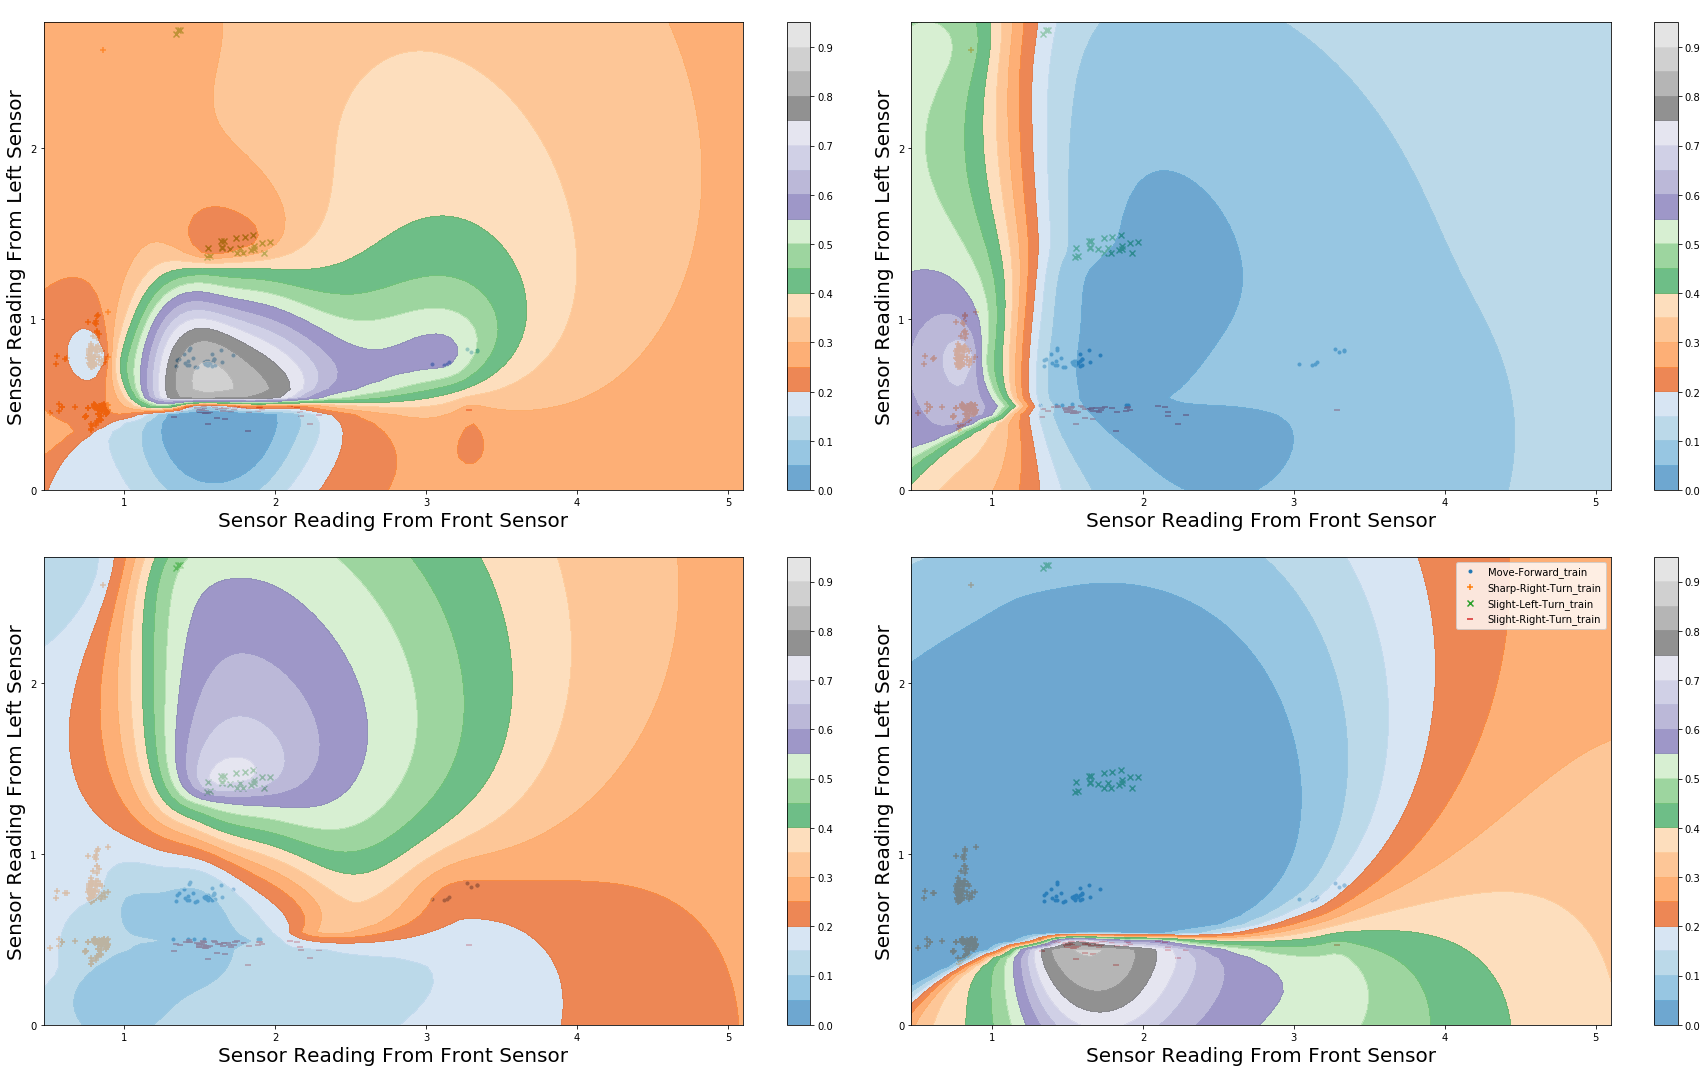

('Training set score: 1.000000', 273)
('Test set score: 0.800661', 2724)


In [249]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

file1=['./data/robot/2/','2.csv']

X_train, X_test, y_train, y_test = read_data(file1[0])
# X=np.concatenate((X_train,X_test), axis=0)
# y=np.concatenate((y_train,y_test), axis=0)
X_train, X_tests, y_train, y_tests = \
        train_test_split(X_train,y_train, test_size=0.9, random_state=1)  
gpc=GaussianProcessClassifier(2.0 * RBF(1.0))

gpc.fit(X_train, y_train)
label=mlp.classes_

figure = plt.figure(figsize=(25, 15))
h=0.05
x1_min, x1_max = X.T[0].min() - .1, X.T[0].max() +.1
x2_min, x2_max =X.T[1].min() - .1, X.T[1].max() + .1
xx, yy = np.meshgrid(np.arange(x1_min-1, x1_max+1, h),np.arange(x2_min-1, x2_max+1, h))
cmap1 = plt.cm.RdBu
cmap2 = plt.cm.Set2
cmap3 = plt.cm.tab20c
for i in xrange(0,len(label)):
    ax = plt.subplot(2, 2, i+1)
    ax.set_title(" ")
    ax.set_ylim(x2_min, x2_max)
    ax.set_xticks(range(int(floor(x1_min)),int(ceil(x1_max))))
    ax.set_yticks(range(int(floor(x2_min)),int(ceil(x2_max))))
    ax.set_xlabel('Sensor Reading From Front Sensor',size=20)
    ax.set_ylabel('Sensor Reading From Left Sensor',size=20)
    for j in range(0,len(label)):
        index=(y_train==label[j])
        ax.scatter(X_train[index].T[0], X_train[index].T[1],cmap=cmap1,marker=markers[j],label=label[j]+'_train')
        
        ax.set_xlim(x1_min, x1_max)
        Z = gpc.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, i]
        Z = Z.reshape(xx.shape)
    cntr1 = ax.contourf(xx, yy, Z, cmap=cmap3,levels=np.arange(0,1,0.05), alpha=.7)
    cbar0 = plt.colorbar( cntr1,)
plt.legend()
plt.tight_layout()
plt.show()

print("Training set score: %f" % gpc.score(X_train, y_train),len(y_train))

print("Test set score: %f" % gpc.score(X_test, y_test),len(y_test))


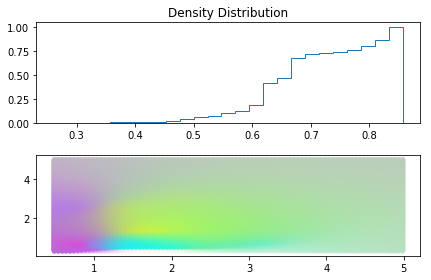

In [290]:
y_pred= np.array(gpc.predict_proba(X_train))
y_pred_index=np.argmax(y_pred, axis=1)
yh= np.array([ [label[i],y_true,float(prob[i])] for i,y_true,prob in zip(y_pred_index,y_train,y_pred)])    
yp= np.array([ float(prob[i]) for i,prob in zip(y_pred_index,y_pred)])    

ax = plt.subplot(2, 1, 1)
ax.set_title("Density Distribution")
plt.hist(yp,bins=25,density=True, histtype='step',cumulative=True)

h=0.05
x1_min, x1_max = X_train.T[0].min() - .01, X_train.T[0].max() +.01
x2_min, x2_max =X_train.T[1].min() - .01, X_train.T[1].max() + .01
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h),np.arange(x2_min, x2_max, h))
M=np.c_[xx.ravel(), yy.ravel()]
R=gpc.predict_proba(M)
ax = plt.subplot(2, 1, 2)
ax.scatter(M.T[0], M.T[1],c=1-R,marker=".",s=100)

plt.legend()
plt.tight_layout()
plt.show()




In [262]:
y_pred= np.array(gpc.predict_proba(X_test))
y_pred_index=np.argmax(y_pred, axis=1)
yh= np.array([ [label[i],y_true,float(prob[i])] for i,y_true,prob in zip(y_pred_index,y_test,y_pred)])    
yp= np.array([ float(prob[i]) for i,prob in zip(y_pred_index,y_pred)])    


id1=np.logical_and(yp>=0.3,yp<0.4)
id2=np.logical_and(yp>=0.4,yp<0.5)
id3=np.logical_and(yp>=0.5,yp<0.6)
id4=np.logical_and(yp>=0.6,yp<0.7)
id5=yp>=0.7

print accuracy_score(yh.T[0][id1], yh.T[1][id1]),len(yh.T[1][id1])
print accuracy_score(yh.T[0][id2], yh.T[1][id2]),len(yh.T[1][id2])
print accuracy_score(yh.T[0][id3], yh.T[1][id3]),len(yh.T[1][id3])
print accuracy_score(yh.T[0][id4], yh.T[1][id4]),len(yh.T[1][id4])
print accuracy_score(yh.T[0][id5], yh.T[1][id5]),len(yh.T[1][id5])


0.618421052632 76
0.560975609756 451
0.600294985251 678
0.951716738197 932
1.0 587


## SVM RBF


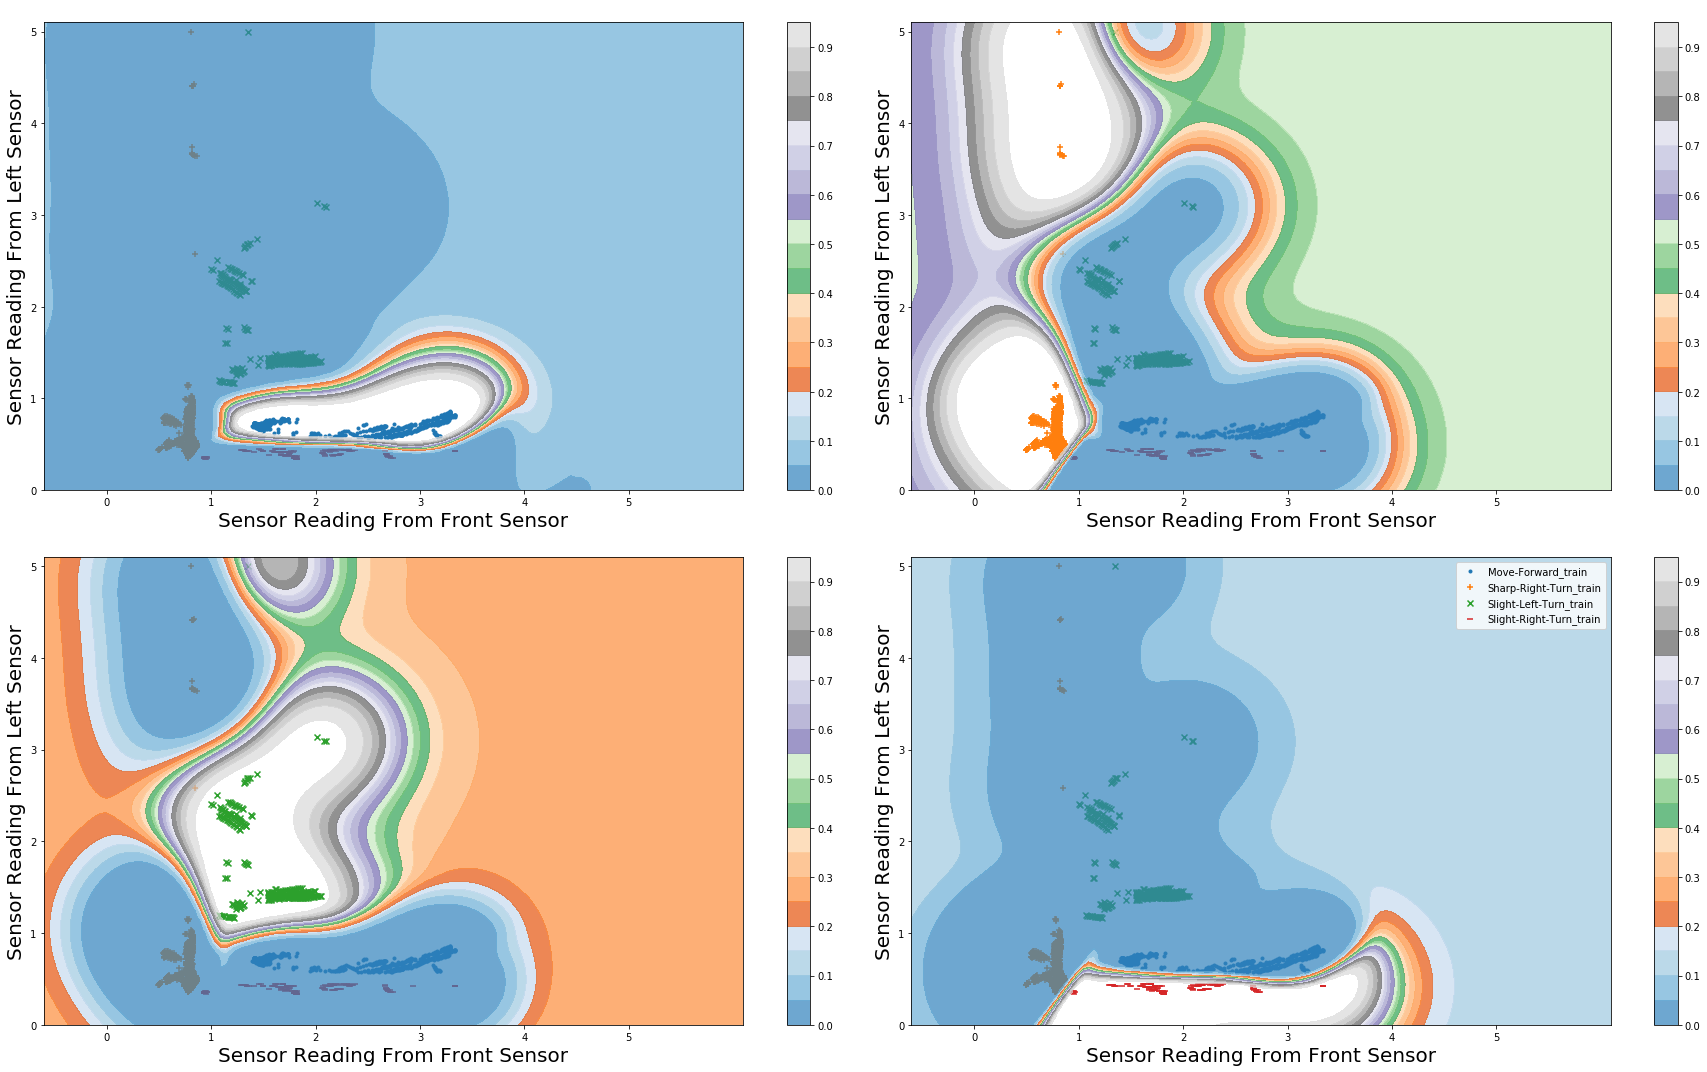

('Training set score: 0.999633', 2728)
('Test set score: 0.659699', 2727)


In [13]:
from sklearn.svm import SVC
file1=['./data/robot/2/','2.csv']

X_train, X_test, y_train, y_test = read_data(file1[0])
# X=np.concatenate((X_train,X_test), axis=0)
# y=np.concatenate((y_train,y_test), axis=0)
# X_train, X_test, y_train, y_test = \
#         train_test_split(X,y, test_size=0.2, random_state=1)  
svc=SVC(gamma=2, C=1,probability=True)

svc.fit(X_train, y_train)

label=mlp.classes_

figure = plt.figure(figsize=(25, 15))
h=0.05
x1_min, x1_max = X.T[0].min() - .1, X.T[0].max() +.1
x2_min, x2_max =X.T[1].min() - .1, X.T[1].max() + .1
xx, yy = np.meshgrid(np.arange(x1_min-1, x1_max+1, h),np.arange(x2_min-1, x2_max+1, h))
cmap1 = plt.cm.RdBu
cmap2 = plt.cm.Set2
cmap3 = plt.cm.tab20c



for i in xrange(0,len(label)):
    ax = plt.subplot(2, 2, i+1)
    ax.set_title(" ")
    ax.set_ylim(x2_min, x2_max)
    ax.set_xticks(range(int(floor(x1_min)),int(ceil(x1_max))))
    ax.set_yticks(range(int(floor(x2_min)),int(ceil(x2_max))))
    ax.set_xlabel('Sensor Reading From Front Sensor',size=20)
    ax.set_ylabel('Sensor Reading From Left Sensor',size=20)
    for j in range(0,len(label)):
        index=(y_train==label[j])
        ax.scatter(X_train[index].T[0], X_train[index].T[1],cmap=cmap1,marker=markers[j],label=label[j]+'_train')
        index=(y_test==label[j])
#         ax.scatter(X_test[index].T[0], X_test[index].T[1] ,cmap=cmap1,marker=markers[j],label=label[j]+'_test')  
#         ax.set_xlim(x1_min, x1_max)
    Z = svc.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,i]
    Z = Z.reshape(xx.shape)
    cntr1 = ax.contourf(xx, yy, Z, levels=np.arange(0,1,0.05),cmap=cmap3, alpha=.7)
    cbar0 = plt.colorbar( cntr1,)
plt.legend()
plt.tight_layout()
plt.show()

print("Training set score: %f" % svc.score(X_train, y_train),len(y_train))

print("Test set score: %f" % svc.score(X_test, y_test),len(y_test))



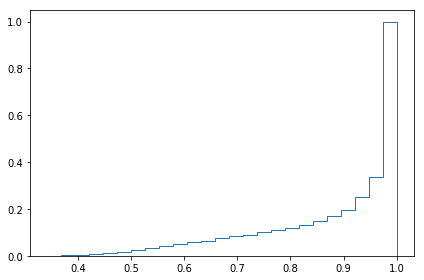

Test Uncertain 0.641480339244 2594
Test certain 0.982523593149 2861


In [390]:
label=mlp.classes_
y_pred= np.array(svc.predict_proba(X))
y_pred_index=np.argmax(y_pred, axis=1)
yh= np.array([ [label[i],y_true] for i,y_true in zip(y_pred_index,y)])    
yvc= np.array([ float(prob[i]) for i,prob in zip(y_pred_index,y_pred)])


ax = plt.subplot(1, 1, 1)
plt.hist(yvc,bins=25,density=True, histtype='step',cumulative=True)  
plt.legend()
plt.tight_layout()
plt.show()

threshold=0.7
    
id1=yp<threshold
id2=yp>=threshold

print "Test Uncertain", accuracy_score(yh.T[0][id1], yh.T[1][id1]), len(yh.T[1][id1])
print "Test certain", accuracy_score(yh.T[0][id2], yh.T[1][id2]),len(yh.T[1][id2])
